In [ ]:
# For google colab use
"""
from google.colab import drive
drive.mount('/content/drive')
!unzip -q -n './drive/MyDrive/Colab Notebooks/Project/dataset.zip' -d '../../'
!cp './drive/MyDrive/Colab Notebooks/Project/base_lib.py' '../../'
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n!unzip -q -n './drive/MyDrive/Colab Notebooks/Project/dataset.zip' -d '.'\n!cp './drive/MyDrive/Colab Notebooks/Project/base_lib.py' '.'\n"

### Testing with SGD
### Ming Ong

#### Import necessary libraries

In [2]:
import sys
sys.path.append('../../')
from base_lib import *
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
IMAGE_SIZE = (128, 128) # Possibly redefine image re-sizing parameters

#### Train SGD classifier

In [ ]:
RANDOM_STATE = 42
train_files, test_files = train_test_split(filenames, random_state=RANDOM_STATE)
X_train, y_train = extract_multiple_images(train_files)

sgd_model = make_pipeline(StandardScaler(), SGDClassifier(class_weight='balanced', loss='log_loss', verbose=1))
sgd_model.fit(X_train, y_train)

-- Epoch 1
Norm: 1.77, NNZs: 6, Bias: -0.623453, T: 4079616, Avg. loss: 0.930358
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 6, Bias: -0.752778, T: 8159232, Avg. loss: 0.598920
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 6, Bias: -1.017869, T: 12238848, Avg. loss: 0.588752
Total training time: 3.09 seconds.
-- Epoch 4
Norm: 1.94, NNZs: 6, Bias: -0.748370, T: 16318464, Avg. loss: 0.583966
Total training time: 4.12 seconds.
-- Epoch 5
Norm: 1.92, NNZs: 6, Bias: -0.780673, T: 20398080, Avg. loss: 0.580979
Total training time: 5.15 seconds.
-- Epoch 6
Norm: 1.84, NNZs: 6, Bias: -0.666799, T: 24477696, Avg. loss: 0.580455
Total training time: 6.18 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 6, Bias: -0.677048, T: 28557312, Avg. loss: 0.578331
Total training time: 7.21 seconds.
-- Epoch 8
Norm: 1.72, NNZs: 6, Bias: -0.860033, T: 32636928, Avg. loss: 0.578611
Total training time: 8.25 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 6, Bias: -0.828968, T: 36716544, Avg.

,steps,"[('standardscaler', ...), ('sgdclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


#### Test the classifier on a test file and visualise outputs

False
IOU: 0.02454242928452579
False
IOU: 0.010535557506584723
False
IOU: 0.0005812263876780006
False
IOU: 0.030100334448160536
False
IOU: 0.025833724753405354
IOU score: 0.06993017389046018


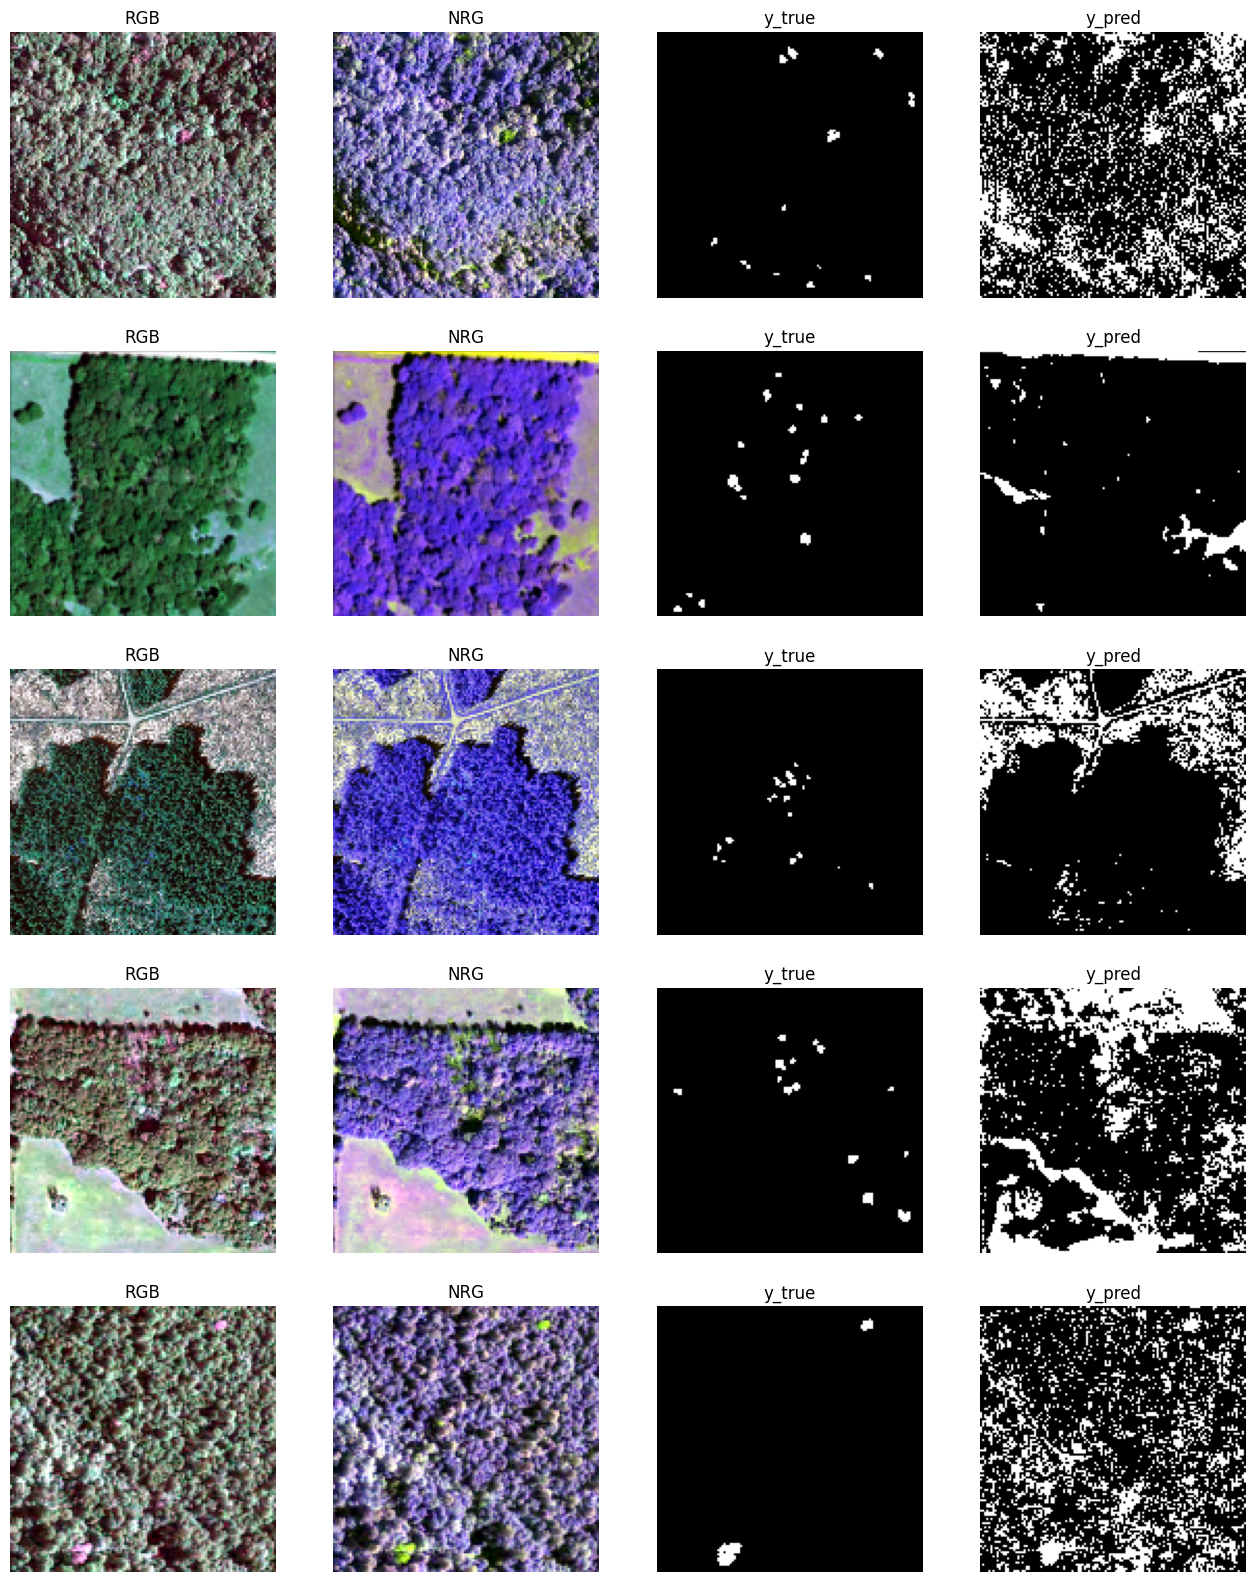

In [4]:
random.seed(42)
NUM_TEST_SAMPLES = 5
fig, axes = plt.subplots(nrows=NUM_TEST_SAMPLES, ncols=4, figsize=(16, 20))

for base_filename, i in zip(random.sample(test_files, NUM_TEST_SAMPLES), range(NUM_TEST_SAMPLES)):
    print(base_filename in train_files)
    X_1_test, y_1_test = extract_basic_image_data(base_filename, IMAGE_SIZE)
    y_1_pred = sgd_model.predict(X_1_test)

    rgb_filename = rgb_prefix + base_filename
    nrg_filename = nrg_prefix + base_filename
    mask_filename = mask_prefix + base_filename

    mask = cv2.resize(cv2.imread(mask_filename, flags=cv2.IMREAD_GRAYSCALE), IMAGE_SIZE)
    mask = mask.reshape(-1)
    mask = (mask > 127).astype(np.uint8)
    rgb_image = cv2.resize(cv2.imread(rgb_filename), IMAGE_SIZE)
    nrg_image = cv2.resize(cv2.imread(nrg_filename), IMAGE_SIZE)

    iou = iou_score(y_1_test, y_1_pred)
    print(f'IOU: {iou}')

    axes[i][0].imshow(rgb_image)
    axes[i][0].axis('off')
    axes[i][0].set_title('RGB')

    axes[i][1].imshow(nrg_image)
    axes[i][1].axis('off')
    axes[i][1].set_title('NRG')

    axes[i][2].imshow(y_1_test.reshape(IMAGE_SIZE), cmap='gray')
    axes[i][2].axis('off')
    axes[i][2].set_title('y_true')

    axes[i][3].imshow(y_1_pred.reshape(IMAGE_SIZE), cmap='gray')
    axes[i][3].axis('off')
    axes[i][3].set_title('y_pred')

fig.show()
score = 0
for base_filename in test_files:
    X_test, y_test = extract_basic_image_data(base_filename, IMAGE_SIZE)
    y_pred = sgd_model.predict(X_test)
    score += iou_score(y_test, y_pred)
score /= len(test_files)
print(f'IOU score: {score}')